In [1]:
#imports

import torch as torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader 
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
#hiper params
batchSize = 64
lr = 0.01
epochs = 2

In [3]:
#descargando dataset

trainSet = datasets.FashionMNIST(root='./', train=True, transform=transforms.ToTensor(), download=True)
testSet = datasets.FashionMNIST(root='./', train=False, transform=transforms.ToTensor(), download=True)
# data loader
trainLoader = DataLoader(trainSet, batch_size=batchSize, shuffle=True)
testLoader = DataLoader(testSet, batch_size=batchSize, shuffle=True)

In [4]:
# arquitectura 

class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels= 12, kernel_size= 3,stride=1, padding=1) # 1 input channel, 3 output channels, 1x1 kernel size img out 28*28
        self.bn1 = nn.BatchNorm2d(12)       # img out 28*28
        self.cnn2 = nn.Conv2d(12,24,3,2,1)   # img out 14*14
        self.bn2 = nn.BatchNorm2d(24)       # img out 14*14
        self.cnn3 = nn.Conv2d(24,48,3,2,1)   # img out 7*7
        self.bn3 = nn.BatchNorm2d(48)       # img out 7*7
        self.flat = nn.Flatten()           # img out 7*7
        self.fc1 = nn.Linear(48*7*7,10)     # img out 7*7
    def forward(self,x):
        #print(x.shape)
        x = F.relu(self.bn1(self.cnn1(x)))
        #print(f"k= 1 s= 1, shape ={x.shape}")
        x = F.relu(self.bn2(self.cnn2(x)))
        #print(f"k= 2 s= 2, shape ={x.shape}")
        x = F.relu(self.bn3(self.cnn3(x)))
        #print(f"k= 2 s= 2, shape ={x.shape}")
        x = self.flat(x)
        #print(f"k= 2 s= 2, shape ={x.shape}")
        x = self.fc1(x)
        #print(f"k= 2 s= 2, shape ={x.shape}")
        return x


In [5]:
#Ejemplo para probar que la arquitecutra funciona
example = torch.randn(1,1,28,28)

exampleModel = NN()
exampleModel(example)

tensor([[-0.5396, -0.0198,  0.1609, -0.8086,  0.5264,  0.5758,  0.2187,  0.2298,
          0.6347,  0.6403]], grad_fn=<AddmmBackward0>)

In [6]:
def train(model, data, lossFunction,optimizer, epochs = 1):
    model.train()
    for epoch in range(epochs):
        print(epoch)
        for (x,y) in data:
            #forward
            pred = model(x)
            loss= lossFunction(pred,y)
            #backward
            optimizer.zero_grad()
            loss.backward()
            #actualizar parametros
            optimizer.step()
    return


In [7]:
def check_acuracy(loader,model):
    corrects = 0
    samples = 0
    model.eval() #ponemos el modelo en modo evaluacion, de modo que no altera los parametros

    with torch.no_grad(): #desactivamos los gradientes
        for x,y in loader:
            pred = model(x)
            pred = pred.argmax(dim=1)
            corrects += (pred == y).sum()
            samples += x.shape[0]
    print('Accuracy: %.2f' % (corrects/samples))
    model.train() #reactivamos el entrenamiento

In [8]:
# creando modelo

model = NN()


In [19]:
#Testeo para buscar lr 
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= lr)
train(model, trainLoader, loss, optimizer, 2)
check_acuracy(trainLoader,model)

0
1
Accuracy: 0.92


## lr  acuracy

0.01    0.92

0.005   0.92

0.001   0.94

0.0005  0.92

0.0001  0.89

In [9]:
# Entrenando modelo
model = NN()
loss = nn.CrossEntropyLoss()
for lr,epochs in [(0.01,2),(0.001,5),(0.0001,2)]:
    optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    train(model, trainLoader, loss, optimizer, epochs)
check_acuracy(trainLoader, model)

0
1
0


KeyboardInterrupt: 

In [1]:
#guardar modelo
torch.save(model.state_dict(), 'model_CNN_10epochs_0.06.2.pt')

NameError: name 'torch' is not defined

Sandal
Sandal


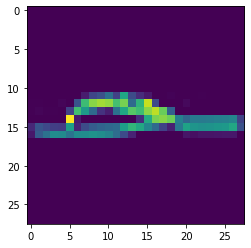

In [12]:
# Usando el modelo
img = 8
print(trainSet.classes[model(testSet[img][0].unsqueeze(0)).argmax()] )
print(trainSet.classes[testSet[img][1]])
plt.imshow(testSet[img][0].reshape(28,28))


In [1]:
# Acuracy final
check_acuracy(testLoader, model)

NameError: name 'check_acuracy' is not defined

## Resultados del entrenamiento
10 epochs = 91%

15 epochs = 